# Introduction

Welcome to "AutoScout Data Analysis Project". This is the capstone project of Data Analysis Module. Auto Scout data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:

First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

In [1045]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import json
import re
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200) 

# 
Load the json file

In [1046]:
df=pd.read_json('/Users/onurhanaydin/Desktop/Data Science/Projects/DAwPy-Capstone AutoScout Project.ipynb/scout_car.json', lines=True) 
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [1047]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

# 
Change the name of columns whose complex naming

In [1048]:
df.rename(columns={"\nComfort & Convenience\n": "Comfort & Convenience", 
                       "\nEntertainment & Media\n": "Entertainment & Media",
                       "\nExtras\n": "Extras",
                       "\nSafety & Security\n": "Safety & Security"}, inplace=True)

# 
Check the percentage of columns whether they have missing values

In [1049]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

kW                               100.00
Last Timing Belt Service Date     99.90
Electricity consumption           99.14
Available from                    98.29
Last Service Date                 96.44
Availability                      96.01
Other Fuel Types                  94.47
Next Inspection                   77.79
Inspection new                    75.30
Emission Label                    74.97
Model Code                        68.73
Non-smoking Vehicle               54.92
Country version                   52.35
Full Service                      48.39
Weight                            43.81
Drive chain                       43.08
prev_owner                        42.89
Previous Owners                   41.71
Paint Type                        36.26
Cylinders                         35.68
Warranty                          34.05
Gears                             29.60
vat                               28.35
Body Color Original               23.61
Upholstery                        23.37


# 
Create a new dataframe to assign the cleaned variables into it

In [1050]:
dfnew=pd.DataFrame()
dfnew

""


# 
All filtering process will be done 
according to https://www.autoscout24.com/refinesearch?sort=standard&desc=0&ustate=N%2CU&atype=C .
So, not all parameters are included into cleaning and filling process. Only sufficient and effective parameters will be used in this operations.

# PART-I/II : Cleaning and Filling Data 

# 
Make 

In [1051]:
mk=df["Make"] 

In [1052]:
mk

0           \nAudi\n
1           \nAudi\n
2           \nAudi\n
3           \nAudi\n
4           \nAudi\n
            ...     
15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, Length: 15919, dtype: object

In [1053]:
mk.isnull().sum()

0

In [1054]:
mk.value_counts()

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [1055]:
dfnew["Make"]=mk.apply(lambda row: row.replace("\n",""))
dfnew

,Make
0,Audi
1,Audi
2,Audi
3,Audi
4,Audi
...,...
15914,Renault
15915,Renault
15916,Renault
15917,Renault


# 
Model

In [1056]:
md=df["Model"]

In [1057]:
md.isnull().sum()

0

In [1058]:
dfnew["Model"]=md.apply(lambda row: row[1])
dfnew

,Make,Model
0,Audi,A1
1,Audi,A1
2,Audi,A1
3,Audi,A1
4,Audi,A1
...,...,...
15914,Renault,Espace
15915,Renault,Espace
15916,Renault,Espace
15917,Renault,Espace


In [1059]:
dfnew["Model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

# 
We have to get rid of "A2" model because it is unsufficient for the model

In [1060]:
dfnew[dfnew["Model"]=="A2"]

,Make,Model
2614,Audi,A2


In [1061]:
dfnew.drop(index=2614, axis=0, inplace=True)

In [1062]:
dfnew["Model"].value_counts(dropna=False) # A2 does not exist

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
Name: Model, dtype: int64

# 
Price

In [1063]:
p=df["price"]

In [1064]:
p.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: price, Length: 2956, dtype: int64

In [1065]:
dfnew["Price"]=p # there is no need to clean
dfnew

,Make,Model,Price
0,Audi,A1,15770
1,Audi,A1,14500
2,Audi,A1,14640
3,Audi,A1,14500
4,Audi,A1,16790
...,...,...,...
15914,Renault,Espace,39950
15915,Renault,Espace,39885
15916,Renault,Espace,39875
15917,Renault,Espace,39700


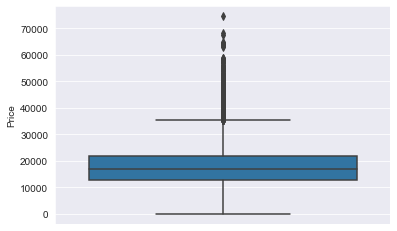

In [1066]:
sns.boxplot(y="Price", data=dfnew);

In [1067]:
dfnew["Price"].sort_values(ascending=False).head(10)

3648     74600
15826    68320
3649     67600
3587     64900
15828    64332
15831    64298
3595     63900
15833    63477
3590     62900
3594     58990
Name: Price, dtype: int64

In [1068]:
dfnew["Price"].sort_values(ascending=False).tail(10)

8823     5450
13770    5445
8824     5300
8826     5250
8825     4990
8827     4950
8829      331
6066      255
8828      120
8594       13
Name: Price, dtype: int64

In [1069]:
dfnew.sort_values(by="Price",ascending=False).tail(5)

,Make,Model,Price
8827,Opel,Corsa,4950
8829,Opel,Corsa,331
6066,Opel,Astra,255
8828,Opel,Corsa,120
8594,Opel,Corsa,13


# 
The last four variables must be changed by multiplying with 100 or 1000

In [1070]:
dfnew.loc[dfnew["Price"] == "331", "Price"] = 33100
dfnew.loc[dfnew["Price"] == "255", "Price"] = 25500
dfnew.loc[dfnew["Price"] == "120", "Price"] = 12000
dfnew.loc[dfnew["Price"] == "13", "Price"] = 13000

# 
Km

In [1071]:
k=df["km"]

In [1072]:
k.isnull().sum()

0

In [1073]:
k.value_counts(dropna=False)

10 km         1045
- km          1024
1 km           367
5 km           170
50 km          148
              ... 
113,490 km       1
58,021 km        1
58,718 km        1
6,730 km         1
17,346 km        1
Name: km, Length: 6690, dtype: int64

In [1074]:
k=k.apply(lambda row: row.replace(",","")) # Firstly, comma was removed

In [1075]:
k=k.apply(lambda row: row.strip("km")) # Then, km was removed 
k

0        56013 
1        80000 
2        83450 
3        73000 
4        16200 
          ...  
15914        - 
15915     9900 
15916       15 
15917       10 
15918        - 
Name: km, Length: 15919, dtype: object

In [1076]:
# We assign missing values to -1 to easy calculate and evaluate

k.replace({"- ":"-1","-":"-1"," -":"-1"}, inplace=True) 

In [1077]:
k.value_counts()

10         1045
-1         1024
1           367
5           170
50          148
           ... 
16634         1
60217         1
24620         1
127963        1
31432         1
Name: km, Length: 6690, dtype: int64

In [1078]:
k=k.astype(int)

In [1079]:
dfnew["km"]=k
dfnew

,Make,Model,Price,km
0,Audi,A1,15770,56013
1,Audi,A1,14500,80000
2,Audi,A1,14640,83450
3,Audi,A1,14500,73000
4,Audi,A1,16790,16200
...,...,...,...,...
15914,Renault,Espace,39950,-1
15915,Renault,Espace,39885,9900
15916,Renault,Espace,39875,15
15917,Renault,Espace,39700,10


In [1080]:
dfnew.km.value_counts(dropna=False)

 10        1045
-1         1024
 1          367
 5          170
 50         148
           ... 
 22368        1
 26462        1
 124920       1
 69467        1
 34815        1
Name: km, Length: 6689, dtype: int64

In [1081]:
#dfnew['km'] = np.floor(pd.to_numeric(dfnew['km'], errors='coerce')).astype('Int64')

In [1082]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Make    15918 non-null  object
 1   Model   15918 non-null  object
 2   Price   15918 non-null  int64 
 3   km      15918 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 621.8+ KB


In [1083]:
dfnew[dfnew.km == -1].groupby(["Make", "Model"])["Price"].mean()

Make     Model   
Audi     A1          23872.329167
         A3          24524.433121
Opel     Astra       20010.666667
         Corsa       13262.138889
         Insignia    29265.736402
Renault  Clio        12014.301075
         Duster      13129.888889
         Espace      37609.959184
Name: Price, dtype: float64

In [1084]:
dfnew.groupby(["Make", "Model"])["Price"].mean()

Make     Model   
Audi     A1          18864.688982
         A3          20996.693252
Opel     Astra       15834.663895
         Corsa       11047.095539
         Insignia    21463.451886
Renault  Clio        11940.320827
         Duster      13230.176471
         Espace      30080.211907
Name: Price, dtype: float64

In [1085]:
# It is clear that cars whose -1 values (NaN values) in km are expensive than other in the same make and model. 
# So, we can consider that missing values are 0 km cars.

In [1086]:
dfnew["km"]=dfnew["km"].apply(lambda row: 0 if row == -1 else row)

In [1087]:
dfnew.km.value_counts(dropna=False)

10        1045
0         1043
1          367
5          170
50         148
          ... 
22368        1
26462        1
124920       1
69467        1
34815        1
Name: km, Length: 6688, dtype: int64

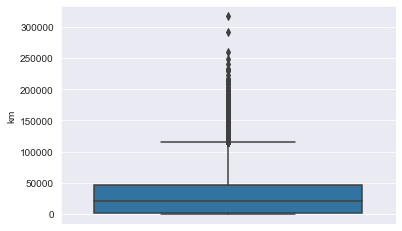

In [1088]:
sns.boxplot(y="km", data=dfnew);

In [1089]:
dfnew.sort_values(by="km",ascending=False).head(10)

,Make,Model,Price,km
9279,Opel,Corsa,8350,317000
3003,Audi,A3,14980,291800
5712,Opel,Astra,6000,260000
6224,Opel,Astra,9800,248000
15277,Renault,Espace,14600,240000
10804,Opel,Insignia,10850,232000
6380,Opel,Astra,7990,231879
6062,Opel,Astra,8980,230928
6399,Opel,Astra,6990,229500
10495,Opel,Insignia,9500,222346


In [1090]:
dfnew

,Make,Model,Price,km
0,Audi,A1,15770,56013
1,Audi,A1,14500,80000
2,Audi,A1,14640,83450
3,Audi,A1,14500,73000
4,Audi,A1,16790,16200
...,...,...,...,...
15914,Renault,Espace,39950,0
15915,Renault,Espace,39885,9900
15916,Renault,Espace,39875,15
15917,Renault,Espace,39700,10


# 
Registration

In [1091]:
reg=df["registration"]

In [1092]:
reg.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
12/2019       1
11/2019       1
08/2019       1
Name: registration, dtype: int64

In [1093]:
dfnew["First Registration"]=reg.apply(lambda row: row[-4:]) # we need to get rid of months
dfnew

,Make,Model,Price,km,First Registration
0,Audi,A1,15770,56013,2016
1,Audi,A1,14500,80000,2017
2,Audi,A1,14640,83450,2016
3,Audi,A1,14500,73000,2016
4,Audi,A1,16790,16200,2016
...,...,...,...,...,...
15914,Renault,Espace,39950,0,-/-
15915,Renault,Espace,39885,9900,2019
15916,Renault,Espace,39875,15,2019
15917,Renault,Espace,39700,10,2019


In [1094]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15918 non-null  object
 1   Model               15918 non-null  object
 2   Price               15918 non-null  int64 
 3   km                  15918 non-null  int64 
 4   First Registration  15918 non-null  object
dtypes: int64(2), object(3)
memory usage: 746.2+ KB


In [1095]:
dfnew[dfnew["First Registration"] == "-/-"] # We have 1597 rows

,Make,Model,Price,km,First Registration
122,Audi,A1,18730,1,-/-
710,Audi,A1,31990,10,-/-
734,Audi,A1,30000,0,-/-
741,Audi,A1,28290,5,-/-
743,Audi,A1,25900,0,-/-
...,...,...,...,...,...
15896,Renault,Espace,41900,5000,-/-
15902,Renault,Espace,41043,0,-/-
15907,Renault,Espace,39990,50,-/-
15912,Renault,Espace,39950,0,-/-


In [1096]:
dfnew[(dfnew["First Registration"] == "-/-") & (dfnew["km"] == 0) ].count()

Make                  857
Model                 857
Price                 857
km                    857
First Registration    857
dtype: int64

# 
I assumed that average km per year travelled by car in Germany is approximately 14000 km

In [1097]:
dfnew.loc[dfnew["First Registration"] == "-/-", "First Registration"] = (2019 - dfnew["km"] // 14000).astype("str")

In [1098]:
dfnew["First Registration"].value_counts()

2018    4525
2019    4437
2016    3674
2017    3277
2013       3
2014       1
2015       1
Name: First Registration, dtype: int64

In [1099]:
dfnew["First Registration"]=dfnew["First Registration"].astype(int)

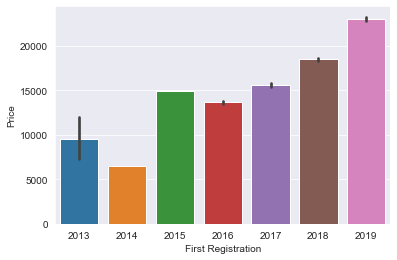

In [1100]:
sns.barplot(x="First Registration", y="Price", data=dfnew);

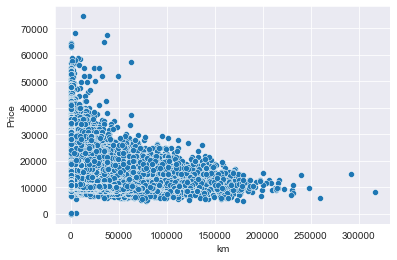

In [1101]:
sns.scatterplot(x="km", y="Price", data=dfnew);

In [1102]:
dfnew

,Make,Model,Price,km,First Registration
0,Audi,A1,15770,56013,2016
1,Audi,A1,14500,80000,2017
2,Audi,A1,14640,83450,2016
3,Audi,A1,14500,73000,2016
4,Audi,A1,16790,16200,2016
...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019
15915,Renault,Espace,39885,9900,2019
15916,Renault,Espace,39875,15,2019
15917,Renault,Espace,39700,10,2019


# 
Body Type

In [1103]:
bt=df["body_type"]

In [1104]:
bt.isnull().sum()

60

In [1105]:
bt.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [1106]:
dfnew["Body Type"]=bt # there is no need to clean
dfnew

,Make,Model,Price,km,First Registration,Body Type
0,Audi,A1,15770,56013,2016,Sedans
1,Audi,A1,14500,80000,2017,Sedans
2,Audi,A1,14640,83450,2016,Sedans
3,Audi,A1,14500,73000,2016,Sedans
4,Audi,A1,16790,16200,2016,Sedans
...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van
15915,Renault,Espace,39885,9900,2019,Van
15916,Renault,Espace,39875,15,2019,Van
15917,Renault,Espace,39700,10,2019,Van


In [1107]:
dfnew[dfnew["Body Type"].isnull()]

,Make,Model,Price,km,First Registration,Body Type
3175,Audi,A3,14400,119000,2016,None
3255,Audi,A3,18500,70000,2016,None
3975,Audi,A3,19950,25000,2017,None
3997,Audi,A3,19750,38800,2017,None
4206,Audi,A3,18490,20000,2017,None
4297,Audi,A3,17990,20000,2017,None
4298,Audi,A3,17990,20000,2017,None
5718,Opel,Astra,12990,47000,2016,None
5938,Opel,Astra,12990,47000,2016,None
5940,Opel,Astra,12990,47000,2016,None


In [1108]:
dfnew.groupby(["Make", "Model", "Body Type"])["Price"].mean()

Make     Model     Body Type    
Audi     A1        Compact          19189.373436
                   Coupe            14925.000000
                   Other            22026.153846
                   Sedans           18631.540312
                   Station wagon    17811.380952
                   Van              29000.000000
         A3        Compact          19024.472527
                   Convertible      27905.375000
                   Coupe            17745.000000
                   Other            20388.125000
                   Sedans           21163.900693
                   Station wagon    20684.354610
Opel     Astra     Compact          16199.762162
                   Coupe            22240.000000
                   Off-Road         18590.000000
                   Other            13864.313433
                   Sedans           15963.178538
                   Station wagon    15771.072667
         Corsa     Compact          11792.683740
                   Coupe            

In [1109]:
dfnew["Body Type"]=dfnew["Body Type"].fillna(dfnew.groupby('Model')['Body Type'].transform(lambda x: x.mode().iloc[0]))

In [1110]:
dfnew["Body Type"].value_counts()

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: Body Type, dtype: int64

In [1111]:
dfnew

,Make,Model,Price,km,First Registration,Body Type
0,Audi,A1,15770,56013,2016,Sedans
1,Audi,A1,14500,80000,2017,Sedans
2,Audi,A1,14640,83450,2016,Sedans
3,Audi,A1,14500,73000,2016,Sedans
4,Audi,A1,16790,16200,2016,Sedans
...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van
15915,Renault,Espace,39885,9900,2019,Van
15916,Renault,Espace,39875,15,2019,Van
15917,Renault,Espace,39700,10,2019,Van


# 
Fuel

In [1112]:
fuel=df.Fuel

In [1113]:
fuel

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [1114]:
fuel=fuel.apply(lambda row: str(row)[8:-8]) # throw unwanted characters away in the Fuel column 

In [1115]:
fuel=fuel.apply(lambda row: str(row)[:4]) 
fuel.value_counts()

Dies    7299
Supe    4790
Gaso    3252
Regu     503
CNG       33
LPG       16
Liqu      10
Othe       6
Elec       5
CNG        3
Biog       1
Dome       1
Name: Fuel, dtype: int64

In [1116]:
# Fuel types were classified as Diesel: Dies; Gasoline: Supe, Gaso, Regu

fuel.replace({"Dies":"Diesel", "Supe":"Gasoline", "Gaso":"Gasoline", "Regu":"Gasoline","CNG":"LPG"}, inplace=True)
fuel

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Gasoline
15916      Diesel
15917      Diesel
15918    Gasoline
Name: Fuel, Length: 15919, dtype: object

In [1117]:
dfnew["Fuel"]=fuel

In [1118]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel
0,Audi,A1,15770,56013,2016,Sedans,Diesel
1,Audi,A1,14500,80000,2017,Sedans,Gasoline
2,Audi,A1,14640,83450,2016,Sedans,Diesel
3,Audi,A1,14500,73000,2016,Sedans,Diesel
4,Audi,A1,16790,16200,2016,Sedans,Diesel
...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel
15915,Renault,Espace,39885,9900,2019,Van,Gasoline
15916,Renault,Espace,39875,15,2019,Van,Diesel
15917,Renault,Espace,39700,10,2019,Van,Diesel


# 
Hp

In [1119]:
hp=df.hp

In [1120]:
hp.isnull().sum()

0

In [1121]:
hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
1 kW        20
78 kW       20
146 kW      18
294 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
76 kW        4
90 kW        4
65 kW        4
98 kW        3
168 kW       3
80 kW        3
93 kW        3
149 kW       3
143 kW       2
270 kW       2
167 kW       2
140 kW       2
127 kW       2
86 kW        2
228 kW       2
40 kW        2
150 kW       2
89 kW        2
63 kW     

In [1122]:
hp = hp.apply(lambda row: row.strip(" kW"))

In [1123]:
hp.value_counts()

85     2542
66     2122
81     1402
100    1308
110    1112
70      888
125     707
51      695
55      569
118     516
92      466
121     392
147     380
77      345
56      286
54      276
103     253
87      232
165     194
88      177
60      160
162      98
-        88
74       81
96       72
71       59
101      47
67       40
154      39
122      35
119      30
164      27
135      24
52       22
82       22
78       20
1        20
146      18
294      18
141      16
57       10
120       8
104       8
191       7
112       7
117       6
155       6
184       5
65        4
90        4
76        4
168       3
98        3
149       3
80        3
93        3
167       2
270       2
63        2
40        2
89        2
228       2
127       2
150       2
143       2
86        2
140       2
53        2
75        1
9         1
84        1
133       1
163       1
195       1
137       1
239       1
132       1
115       1
4         1
44        1
123       1
Name: hp, dtype: int64

In [1124]:
hp=hp.apply(lambda x: pd.to_numeric(x, errors ='coerce'))

In [1125]:
dfnew["Power"]=hp

In [1126]:
dfnew["Power"].value_counts(dropna=False)

85.0     2541
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
1.0        20
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
98.0        3
93.0        3
80.0        3
168.0       3
150.0       2
63.0        2
140.0       2
86.0        2
89.0        2
40.0        2
167.0       2
53.0        2
228.0       2
127.0       2
143.0       2
270.0       2
9.0         1
44.0        1
123.0       1
195.0 

In [1127]:
dfnew["Power"]=dfnew["Power"].fillna(dfnew.groupby(["Model"])["Power"].transform(lambda x: x.mode().iloc[0]))

In [1128]:
dfnew["Power"]=dfnew["Power"].astype(int)

In [1129]:
dfnew["Power"].value_counts()

85     2544
66     2124
81     1404
100    1318
110    1112
70      888
125     707
51      695
55      598
118     550
92      466
121     392
147     380
77      353
56      286
54      276
103     253
87      232
165     194
88      177
60      160
162      98
74       81
96       72
71       59
101      47
67       40
154      39
122      35
119      30
164      27
135      24
82       22
52       22
78       20
1        20
146      18
294      18
141      16
57       10
104       8
120       8
191       7
112       7
117       6
155       6
184       5
65        4
90        4
76        4
93        3
168       3
98        3
149       3
80        3
150       2
86        2
270       2
167       2
143       2
127       2
63        2
40        2
228       2
140       2
89        2
53        2
133       1
123       1
9         1
137       1
75        1
115       1
195       1
163       1
4         1
44        1
84        1
132       1
239       1
Name: Power, dtype: int64

# 
Gear

In [1130]:
gear=df["Gearing Type"]

In [1131]:
gear.isnull().sum()

0

In [1132]:
dfnew["Gear"]=gear.apply(lambda row: row[1])
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic
...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic


# 
Number of Doors

In [1133]:
doors=df['Nr. of Doors']

In [1134]:
doors

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object

In [1135]:
doors.isnull().sum()

212

In [1136]:
doors=[int(item[0].strip("\n")) if isinstance(item, list) else item for item in doors]

In [1137]:
doors=pd.DataFrame(doors)

In [1138]:
doors

,0
0,5.0
1,3.0
2,4.0
3,3.0
4,5.0
...,...
15914,5.0
15915,5.0
15916,5.0
15917,5.0


In [1139]:
dfnew["Nr of Doors"]=doors

In [1140]:
dfnew['Nr of Doors'].value_counts(dropna=False)

5.0    11574
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr of Doors, dtype: int64

In [1141]:
dfnew[dfnew["Nr of Doors"].isnull()]

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors
166,Audi,A1,17500,23664,2018,Sedans,Diesel,66,Automatic,NaN
488,Audi,A1,13900,100816,2016,Sedans,Diesel,85,Manual,NaN
535,Audi,A1,12990,41200,2016,Compact,Gasoline,70,Manual,NaN
825,Audi,A1,13990,57250,2016,Compact,Diesel,66,Manual,NaN
828,Audi,A1,13990,56150,2016,Sedans,Diesel,85,Manual,NaN
...,...,...,...,...,...,...,...,...,...,...
15368,Renault,Espace,18999,81120,2016,Van,Diesel,118,Manual,NaN
15687,Renault,Espace,38890,350,2018,Van,Gasoline,165,Automatic,NaN
15740,Renault,Espace,34990,12611,2018,Van,Diesel,118,Automatic,NaN
15743,Renault,Espace,34990,7900,2018,Van,Gasoline,165,Automatic,NaN


In [1142]:
dfnew.groupby(["Model", "Body Type", "First Registration"])["Nr of Doors"].mean()

Model     Body Type      First Registration
A1        Compact        2016                  4.056034
                         2017                  3.875000
                         2018                  4.647940
                         2019                  4.776860
          Coupe          2016                  2.000000
                         2017                  5.000000
          Other          2017                  5.000000
                         2018                  5.000000
                         2019                  4.444444
          Sedans         2016                  4.364341
                         2017                  4.500000
                         2018                  4.602174
                         2019                  4.743405
          Station wagon  2016                  4.600000
                         2017                  5.000000
                         2018                  4.727273
                         2019                  5.000000
    

In [1143]:
dfnew["Nr of Doors"]=dfnew["Nr of Doors"].fillna(dfnew.groupby(["Model"])["Nr of Doors"].transform(lambda x: x.mode().iloc[0]))

In [1144]:
dfnew["Nr of Doors"].value_counts()

5.0    11786
4.0     3079
3.0      832
2.0      219
7.0        1
1.0        1
Name: Nr of Doors, dtype: int64

In [1145]:
dfnew.loc[dfnew["Nr of Doors"] == 1, "Nr of Doors"] = 2
dfnew.loc[dfnew["Nr of Doors"] == 7, "Nr of Doors"] = 5

In [1146]:
dfnew["Nr of Doors"]=dfnew["Nr of Doors"].astype(int)

In [1147]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5
...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5


# 
Number of Seats

In [1148]:
seats=df["Nr. of Seats"]

In [1149]:
seats.isnull().sum()

977

In [1150]:
seats=[int(item[0].strip("\n")) if isinstance(item,list) else item for item in seats]

In [1151]:
seats=pd.DataFrame(seats)

In [1152]:
dfnew["Nr of Seats"]=seats

In [1153]:
dfnew[dfnew["Nr of Seats"].isnull()]

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats
11,Audi,A1,17990,26415,2016,Sedans,Gasoline,92,Automatic,4,NaN
28,Audi,A1,18900,14556,2018,Sedans,Diesel,66,Automatic,5,NaN
44,Audi,A1,11490,44120,2016,Sedans,Diesel,66,Manual,2,NaN
76,Audi,A1,18880,7021,2018,Compact,Gasoline,70,Automatic,5,NaN
129,Audi,A1,18500,9000,2017,Sedans,Gasoline,70,Automatic,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15852,Renault,Espace,44999,50,2019,Van,Diesel,147,Automatic,4,NaN
15857,Renault,Espace,43990,13,2019,Van,Diesel,147,Automatic,4,NaN
15869,Renault,Espace,49100,11,2019,Van,Diesel,146,Automatic,5,NaN
15876,Renault,Espace,48765,11,2019,Van,Gasoline,165,Automatic,5,NaN


In [1154]:
dfnew["Nr of Seats"]=dfnew["Nr of Seats"].fillna(dfnew.groupby(["Model"])["Nr of Seats"].transform(lambda x: x.mode().iloc[0]))

In [1155]:
dfnew["Nr of Seats"].value_counts()

5.0    14312
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr of Seats, dtype: int64

In [1156]:
dfnew.loc[dfnew["Nr of Seats"] == 3, "Nr of Seats"] = 2
dfnew.loc[dfnew["Nr of Seats"] == 6, "Nr of Seats"] = 7

In [1157]:
dfnew["Nr of Seats"]=dfnew["Nr of Seats"].astype(int)

In [1158]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5
...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7


# 
Car Condition

In [1159]:
carco=df["Type"]

In [1160]:
carco.isnull().sum()

2

In [1161]:
carco.apply(lambda row: str(row)[6:9]).value_counts(dropna=False)

Use    11096
New     1650
Pre     1364
Emp     1011
Dem      796
           2
Name: Type, dtype: int64

In [1162]:
carco=carco.apply(lambda row: str(row)[6:9])

In [1163]:
carco.replace({"Use":"Used", "Pre":"Pre-registered", "Emp":"Employee's car","Dem":"Demonstration"}, inplace=True)
carco

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [1164]:
carco=pd.DataFrame(carco)

In [1165]:
dfnew["Car Condition"]=carco

In [1166]:
dfnew[(dfnew["Car Condition"]=="")]

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition
2765,Audi,A3,17900,115137,2016,Sedans,Diesel,110,Automatic,5,5,
5237,Audi,A3,25400,0,2019,Sedans,Diesel,85,Automatic,5,5,


In [1167]:
dfnew.loc[2765, "Car Condition"]="Used"
dfnew.loc[5237, "Car Condition"]="New"

In [1168]:
dfnew[(dfnew["Car Condition"]=="")]

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition


In [1169]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used
...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered


# 
Body Color

In [1170]:
bodc=df["Body Color"]

In [1171]:
bodc.isnull().sum()

597

In [1172]:
bodc = bodc.apply(lambda x: x[1] if isinstance(x, list) else x)

In [1173]:
bodc.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [1174]:
dfnew["Body Color"]=bodc

In [1175]:
dfnew["Body Color"]=dfnew["Body Color"].fillna(dfnew.groupby(["Model"])["Body Color"].transform(lambda x: x.mode().iloc[0]))

In [1176]:
dfnew["Body Color"].value_counts()

Black     3957
Grey      3770
White     3525
Silver    1647
Blue      1431
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [1177]:
dfnew["Body Color"].replace({"Brown":"Other","Green":"Other","Beige":"Other","Yellow":"Other",
"Violet":"Other","Bronze":"Other","Orange":"Other","Gold":"Other"}, inplace=True)

In [1178]:
dfnew["Body Color"].value_counts()

Black     3957
Grey      3770
White     3525
Silver    1647
Blue      1431
Red        957
Other      631
Name: Body Color, dtype: int64

In [1179]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey


# 
Paint Type

In [1180]:
pt=df["Paint Type"]

In [1181]:
pt

0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint Type, Length: 15919, dtype: object

In [1182]:
pt=[item[0].strip("\n") if isinstance(item, list) else item for item in pt]

In [1183]:
pt

['Metallic',
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 'Uni/basic',
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 nan,
 nan,
 nan,
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 nan,
 'Metallic',
 nan,
 'Uni/basic',
 'Metallic',
 nan,
 nan,
 'Metallic',
 'Metallic',
 nan,
 nan,
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 nan,
 nan,
 nan,
 'Metallic',
 nan,
 nan,
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 nan,
 'Metallic',
 nan,
 nan,
 'Metallic',
 'Metallic',
 nan,
 'Metallic',
 nan,
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 'Metallic',
 nan,
 'Metallic',


In [1184]:
pt=pd.DataFrame(pt)

In [1185]:
dfnew["Paint Type"]=pt
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,NaN
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,NaN
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,NaN


In [1186]:
dfnew["Paint Type"].value_counts(dropna=False)

Metallic       9793
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

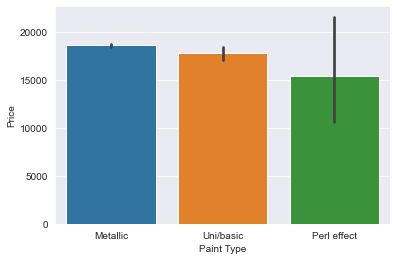

In [1187]:
sns.barplot(x="Paint Type", y="Price", data=dfnew);

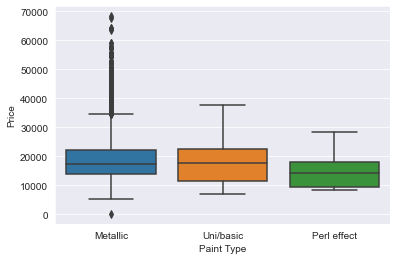

In [1188]:
sns.boxplot(x="Paint Type", y="Price", data=dfnew);

In [1189]:
dfnew.loc[(dfnew["Price"]>39000), "Paint Type"] = "Metallic"

In [1190]:
dfnew["Paint Type"]=dfnew["Paint Type"].fillna(dfnew.groupby(["Model"])["Paint Type"].transform(lambda x: x.mode().iloc[0]))

In [1191]:
dfnew["Paint Type"].value_counts()

Metallic       15548
Uni/basic        364
Perl effect        6
Name: Paint Type, dtype: int64

In [1192]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic


# 
Number of Previous Owners

In [1193]:
preown=df["Previous Owners"]

In [1194]:
preown

0                                                    \n2\n
1                                                      NaN
2                                                    \n1\n
3                                                    \n1\n
4                                                    \n1\n
                               ...                        
15914                                                  NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...
15916                     [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                  NaN
15918                                                \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [1195]:
preown = [item[0] if type(item) == list else item for item in preown]

In [1196]:
preown = [int(item.strip("\n")) if isinstance(item, str) else item for item in preown]

In [1197]:
preown=pd.DataFrame(preown)

In [1198]:
dfnew["Prev Owner"]=preown

In [1199]:
dfnew.loc[(dfnew["Car Condition"]=="New") & (dfnew["Prev Owner"].isnull()), "Prev Owner"]=0
dfnew.loc[(dfnew["km"]==0) & (dfnew["Prev Owner"].isnull()), "Prev Owner"]=0

In [1200]:
dfnew.loc[(dfnew["Prev Owner"].isnull()) & (dfnew["First Registration"] == 2019), "Prev Owner"] = 0
dfnew.loc[(dfnew["Prev Owner"].isnull()) & (dfnew["First Registration"] < 2019), "Prev Owner"] = 1

In [1201]:
dfnew["Prev Owner"]=dfnew["Prev Owner"].astype(int)

In [1202]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic,1
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic,0


# 
Emission Class

In [1203]:
emi=df["Emission Class"]

In [1204]:
emi.isnull().sum()

3021

In [1205]:
emi=emi.apply(lambda x: ''.join(re.findall("[3-7]", str(x))) if isinstance(x, list) else x)

In [1206]:
emi.value_counts(dropna=False)

6      12173
NaN     3021
         607
5         78
4         40
Name: Emission Class, dtype: int64

In [1207]:
dfnew["Emission Class"]=emi

In [1208]:
dfnew.loc[dfnew["Emission Class"] == "", "Emission Class"] = None

In [1209]:
dfnew["Emission Class"].isnull().sum()

3628

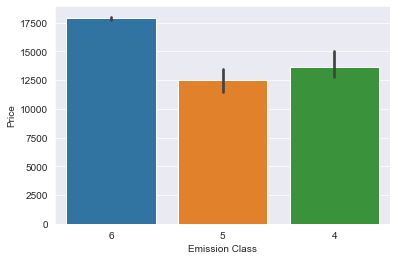

In [1210]:
sns.barplot(x="Emission Class", y="Price", data=dfnew);

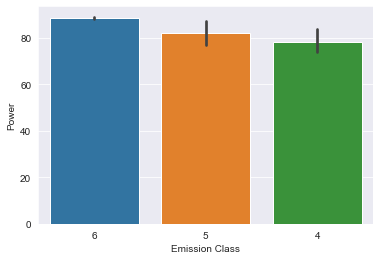

In [1211]:
sns.barplot(x="Emission Class", y="Power", data=dfnew);

In [1212]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0,NaN
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1,NaN
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic,1,6
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic,0,6


In [1213]:
dfnew["Emission Class"]=dfnew["Emission Class"].fillna(dfnew.groupby(["Model"])["Emission Class"].transform(lambda x: x.mode().iloc[0]))

In [1214]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0,6
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1,6
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic,1,6
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic,0,6


# 
Warranty

In [1215]:
war=df["Warranty"]
war

0                 [\n, \n, \n4 (Green)\n]
1                                     NaN
2        [\n, \n, \n99 g CO2/km (comb)\n]
3                                     NaN
4                    [\n, \n, \nEuro 6\n]
                       ...               
15914                       \n24 months\n
15915                [\n, \n, \nEuro 6\n]
15916             [\n, \n, \n4 (Green)\n]
15917                                  \n
15918                                 NaN
Name: Warranty, Length: 15919, dtype: object

In [1216]:
dfnew["Warranty"]=war.apply(pd.Series)[0].str.extract("(\d{1,2})")

In [1217]:
dfnew.groupby(["Warranty","First Registration"])["Prev Owner"].mean()

Warranty  First Registration
1         2016                  1.000000
          2017                  1.000000
          2018                  1.000000
10        2017                  1.000000
11        2016                  1.000000
          2019                  1.000000
12        2016                  1.044199
          2017                  1.025740
          2018                  0.998563
          2019                  0.356481
13        2018                  1.000000
14        2017                  1.000000
          2018                  1.000000
15        2018                  1.000000
16        2018                  1.000000
17        2016                  1.000000
          2018                  1.000000
18        2018                  1.000000
          2019                  0.000000
19        2018                  1.000000
          2019                  0.000000
2         2016                  1.000000
          2017                  1.500000
          2019              

# 
Warranty is not a meaningful parameter for the model. Because it makes us confused and 
there is no logical relationship among Warranty, First Registration, and number of previous owners. 

In [1218]:
dfnew.drop(["Warranty"],axis=1, inplace=True)

In [1219]:
dfnew.head()

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6


# 
Cylinder

In [1220]:
cyc=df["Cylinders"]

In [1221]:
cyc

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [1222]:
cyc = [int(item[0].strip("\n")) if isinstance(item, list) else item for item in cyc]

In [1223]:
cyc=pd.DataFrame(cyc)

In [1224]:
dfnew["Cylinder"]=cyc

In [1225]:
dfnew["Cylinder"].value_counts(dropna=False)

4.0    8105
NaN    5679
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: Cylinder, dtype: int64

In [1226]:
dfnew.groupby(["Model"])["Cylinder"].mean()

Model
A1          3.228490
A3          3.846556
Astra       3.876056
Clio        3.823751
Corsa       3.991435
Duster      4.000000
Espace      4.003115
Insignia    4.002449
Name: Cylinder, dtype: float64

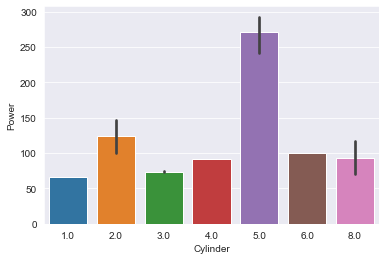

In [1227]:
sns.barplot(x="Cylinder", y="Power", data=dfnew);

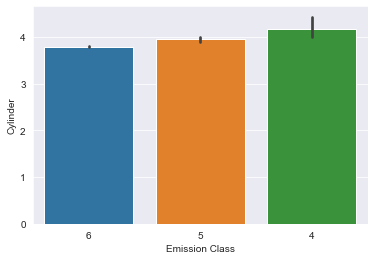

In [1228]:
sns.barplot(y="Cylinder", x="Emission Class", data=dfnew);

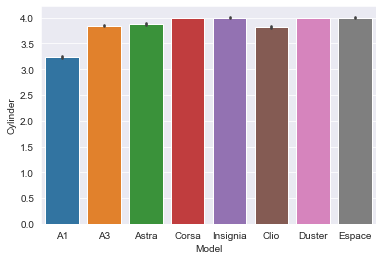

In [1229]:
sns.barplot(y="Cylinder", x="Model", data=dfnew);

In [1230]:
dfnew["Cylinder"]=dfnew["Cylinder"].fillna(dfnew.groupby(["Emission Class"])["Cylinder"].transform(lambda x: x.mode().iloc[0]))

In [1231]:
dfnew["Cylinder"]=dfnew["Cylinder"].astype(int)

In [1232]:
dfnew.head()

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3


# 
Upholstery

In [1233]:
up=df["Upholstery"]

In [1234]:
up.isnull().sum()

3720

In [1235]:
up=up.apply(lambda x: x[0].strip("\n") if isinstance(x, list) else x)

In [1236]:
up

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

In [1237]:
uph=up.str.split(",").str[0]

In [1238]:
upc=up.str.split(",").str[1]

In [1239]:
dfnew["Upholstery"]=uph

In [1240]:
dfnew["Interior Color"]=upc

In [1241]:
dfnew["Upholstery"].value_counts()

Cloth           8422
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
White              2
Blue               2
Name: Upholstery, dtype: int64

In [1242]:
dfnew["Upholstery"].replace({"Black":None, "Other":None, "Grey":None, 
"Brown":None,"Beige":None, "White":None, "Blue":None, "alcantara":"Alcantara"}, inplace=True) 

In [1243]:
dfnew["Upholstery"].value_counts(dropna=False)

Cloth           8422
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
Alcantara         57
Name: Upholstery, dtype: int64

In [1244]:
dfnew["Upholstery"]=dfnew["Upholstery"].fillna(dfnew.groupby(["Model"])["Upholstery"].transform(lambda x: x.mode().iloc[0]))

In [1245]:
dfnew["Upholstery"].value_counts(dropna=False)

Cloth           12895
Part leather     1499
Full leather     1407
Velour             60
Alcantara          57
Name: Upholstery, dtype: int64

In [1246]:
dfnew["Interior Color"].value_counts(dropna=False)

 Black     7709
NaN        5861
 Grey      1103
 Other      960
 Brown      195
 Beige       51
 Blue        14
 White       11
 Red          9
 Yellow       4
 Orange       1
Name: Interior Color, dtype: int64

In [1247]:
dfnew["Interior Color"]=dfnew["Interior Color"].fillna(dfnew.groupby(["Model"])["Interior Color"].transform(lambda x: x.mode().iloc[0]))

In [1248]:
dfnew["Interior Color"].value_counts(dropna=False)

 Black     13554
 Grey       1119
 Other       960
 Brown       195
 Beige        51
 Blue         14
 White        11
 Red           9
 Yellow        4
 Orange        1
Name: Interior Color, dtype: int64

In [1249]:
dfnew.head()

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder,Upholstery,Interior Color
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3,Cloth,Black
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4,Cloth,Grey
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4,Cloth,Black
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3,Cloth,Black
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3,Cloth,Black


# 
Entertainment & Media

In [1250]:
media=df["Entertainment & Media"]

In [1251]:
media=[",".join(item) if type(item)== list else item for item in media]

In [1252]:
media=pd.DataFrame(media)

In [1253]:
dfnew["Media"]=media

In [1254]:
dfnew["Media"].str.get_dummies(sep=",").add_prefix("m ")

,m Bluetooth,m CD player,m Digital radio,m Hands-free equipment,m MP3,m On-board computer,m Radio,m Sound system,m Television,m USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [1255]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder,Upholstery,Interior Color,Media
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3,Cloth,Black,"Bluetooth,Hands-free equipment,On-board comput..."
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4,Cloth,Grey,"Bluetooth,Hands-free equipment,On-board comput..."
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4,Cloth,Black,"MP3,On-board computer"
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3,Cloth,Black,"Bluetooth,CD player,Hands-free equipment,MP3,O..."
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3,Cloth,Black,"Bluetooth,CD player,Hands-free equipment,MP3,O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0,6,4,Full leather,Black,"Bluetooth,Digital radio,Hands-free equipment,O..."
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1,6,4,Cloth,Black,"Bluetooth,Digital radio,Hands-free equipment,R..."
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic,1,6,4,Full leather,Black,"Bluetooth,Hands-free equipment,On-board comput..."
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic,0,6,4,Part leather,Black,"Bluetooth,Digital radio,Radio,USB"


In [1256]:
dfnew=dfnew.join(dfnew["Media"].str.get_dummies(sep=",").add_prefix('m '))

In [1257]:
dfnew.drop(["Media"],axis=1, inplace=True)
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder,Upholstery,Interior Color,m Bluetooth,m CD player,m Digital radio,m Hands-free equipment,m MP3,m On-board computer,m Radio,m Sound system,m Television,m USB
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3,Cloth,Black,1,0,0,1,0,1,1,0,0,0
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4,Cloth,Grey,1,0,0,1,0,1,1,1,0,0
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4,Cloth,Black,0,0,0,0,1,1,0,0,0,0
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,1,0,1
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0,6,4,Full leather,Black,1,0,1,1,0,1,1,0,0,1
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1,6,4,Cloth,Black,1,0,1,1,0,0,1,0,0,1
15916,Renault,Espace,39875,15,2019,Van,Diesel,146,Automatic,5,7,Pre-registered,White,Metallic,1,6,4,Full leather,Black,1,0,0,1,0,1,1,0,0,0
15917,Renault,Espace,39700,10,2019,Van,Diesel,147,Automatic,5,7,Pre-registered,Grey,Metallic,0,6,4,Part leather,Black,1,0,1,0,0,0,1,0,0,1


# 
Comfort & Convenience

In [1258]:
cc=df["Comfort & Convenience"]

In [1259]:
cc=[",".join(item) if type(item)== list else item for item in cc]

In [1260]:
cc=pd.DataFrame(cc)

In [1261]:
dfnew["Comfort and Convenience"]=cc

In [1262]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Make                     15918 non-null  object
 1   Model                    15918 non-null  object
 2   Price                    15918 non-null  int64 
 3   km                       15918 non-null  int64 
 4   First Registration       15918 non-null  int64 
 5   Body Type                15918 non-null  object
 6   Fuel                     15918 non-null  object
 7   Power                    15918 non-null  int64 
 8   Gear                     15918 non-null  object
 9   Nr of Doors              15918 non-null  int64 
 10  Nr of Seats              15918 non-null  int64 
 11  Car Condition            15918 non-null  object
 12  Body Color               15918 non-null  object
 13  Paint Type               15918 non-null  object
 14  Prev Owner               15918 non-nul

In [1263]:
dfnew["Comfort and Convenience"].str.get_dummies(sep=",").add_prefix("cc ")

,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [1264]:
dfnew=dfnew.join(dfnew["Comfort and Convenience"].str.get_dummies(sep=",").add_prefix('cc '))

In [1265]:
dfnew.drop(["Comfort and Convenience"],axis=1, inplace=True)

In [1266]:
dfnew.head()

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder,Upholstery,Interior Color,m Bluetooth,m CD player,m Digital radio,m Hands-free equipment,m MP3,m On-board computer,m Radio,m Sound system,m Television,m USB,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3,Cloth,Black,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4,Cloth,Grey,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4,Cloth,Black,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0


# 
Safety & Security

In [1267]:
ss=df["Safety & Security"]

In [1268]:
ss=[",".join(item) if type(item)== list else item for item in ss]

In [1269]:
ss=pd.DataFrame(ss)

In [1270]:
dfnew["Safety & Security"]=ss

In [1271]:
dfnew["Safety & Security"].str.get_dummies(sep=",").add_prefix("ss ")

,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [1272]:
dfnew=dfnew.join(dfnew["Safety & Security"].str.get_dummies(sep=",").add_prefix('ss '))

In [1273]:
dfnew.drop(["Safety & Security"],axis=1, inplace=True)

# 

# FINAL FORM OF THE DATA

# 

In [1274]:
dfnew

,Make,Model,Price,km,First Registration,Body Type,Fuel,Power,Gear,Nr of Doors,Nr of Seats,Car Condition,Body Color,Paint Type,Prev Owner,Emission Class,Cylinder,Upholstery,Interior Color,m Bluetooth,m CD player,m Digital radio,m Hands-free equipment,m MP3,m On-board computer,m Radio,m Sound system,m Television,m USB,cc Air conditioning,cc Air suspension,cc Armrest,cc Automatic climate control,cc Auxiliary heating,cc Cruise control,cc Electric Starter,cc Electric tailgate,cc Electrical side mirrors,cc Electrically adjustable seats,cc Electrically heated windshield,cc Heads-up display,cc Heated steering wheel,cc Hill Holder,cc Keyless central door lock,cc Leather seats,cc Leather steering wheel,cc Light sensor,cc Lumbar support,cc Massage seats,cc Multi-function steering wheel,cc Navigation system,cc Panorama roof,cc Park Distance Control,cc Parking assist system camera,cc Parking assist system self-steering,cc Parking assist system sensors front,cc Parking assist system sensors rear,cc Power windows,cc Rain sensor,cc Seat heating,cc Seat ventilation,cc Split rear seats,cc Start-stop system,cc Sunroof,cc Tinted windows,cc Wind deflector,cc Windshield,ss ABS,ss Adaptive Cruise Control,ss Adaptive headlights,ss Alarm system,ss Blind spot monitor,ss Central door lock,ss Central door lock with remote control,ss Daytime running lights,ss Driver drowsiness detection,ss Driver-side airbag,ss Electronic stability control,ss Emergency brake assistant,ss Emergency system,ss Fog lights,ss Head airbag,ss Immobilizer,ss Isofix,ss LED Daytime Running Lights,ss LED Headlights,ss Lane departure warning system,ss Night view assist,ss Passenger-side airbag,ss Power steering,ss Rear airbag,ss Side airbag,ss Tire pressure monitoring system,ss Traction control,ss Traffic sign recognition,ss Xenon headlights
0,Audi,A1,15770,56013,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,2,6,3,Cloth,Black,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,Audi,A1,14500,80000,2017,Sedans,Gasoline,141,Automatic,3,4,Used,Red,Metallic,1,6,4,Cloth,Grey,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,Audi,A1,14640,83450,2016,Sedans,Diesel,85,Automatic,4,4,Used,Black,Metallic,1,6,4,Cloth,Black,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,Audi,A1,14500,73000,2016,Sedans,Diesel,66,Automatic,3,4,Used,Other,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,Audi,A1,16790,16200,2016,Sedans,Diesel,66,Automatic,5,5,Used,Black,Metallic,1,6,3,Cloth,Black,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,39950,0,2019,Van,Diesel,147,Automatic,5,5,New,Grey,Metallic,0,6,4,Full leather,Black,1,0,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,Renault,Espace,39885,9900,2019,Van,Gasoline,165,Automatic,5,5,Used,Grey,Metallic,1,6,4,Cloth,Black,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,Renault,Espace,39875,

# 
In this project, the main goal is to predict the price by using different parameters. So, 
that's why the price parameter is lead variable.

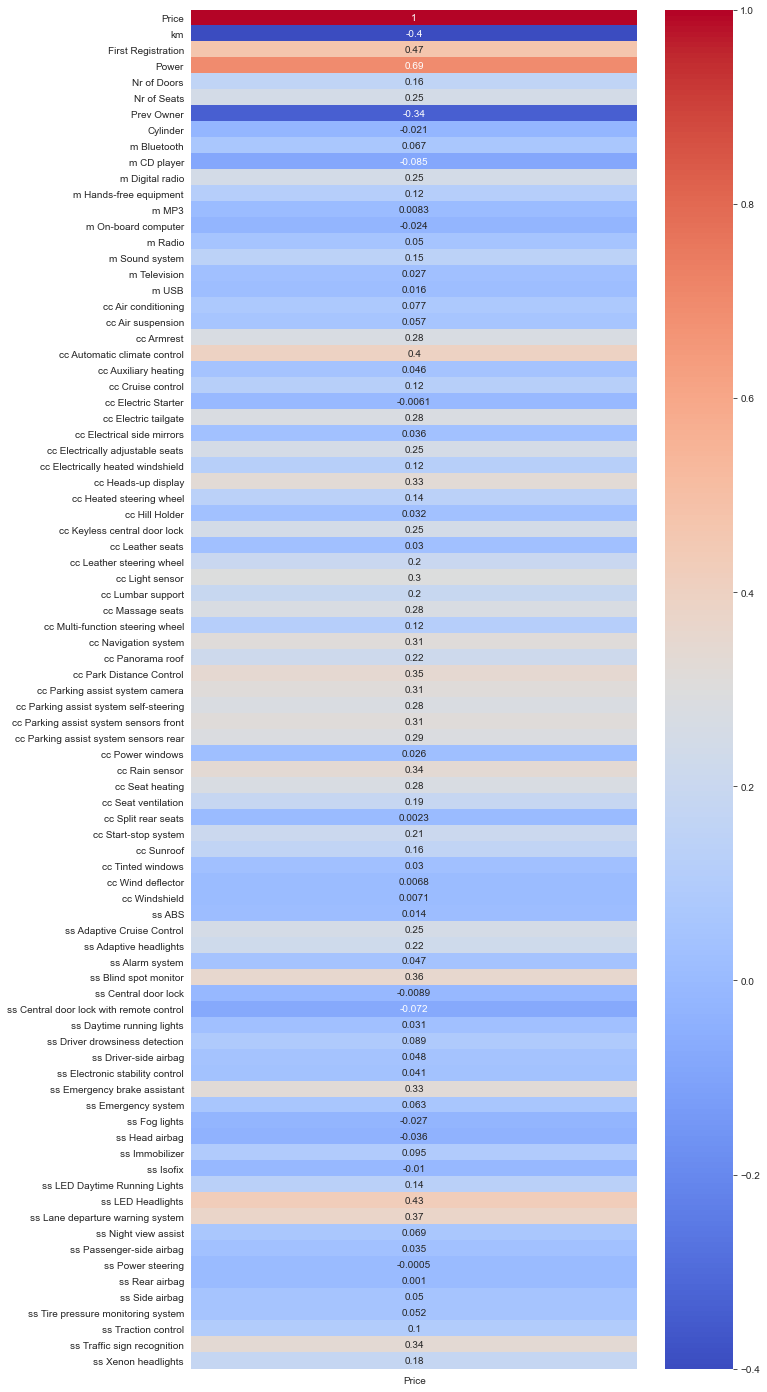

In [1275]:
plt.figure(figsize=(10,25))

ax=sns.heatmap(dfnew.corr().loc[:,["Price"]], annot=True, cmap="coolwarm");

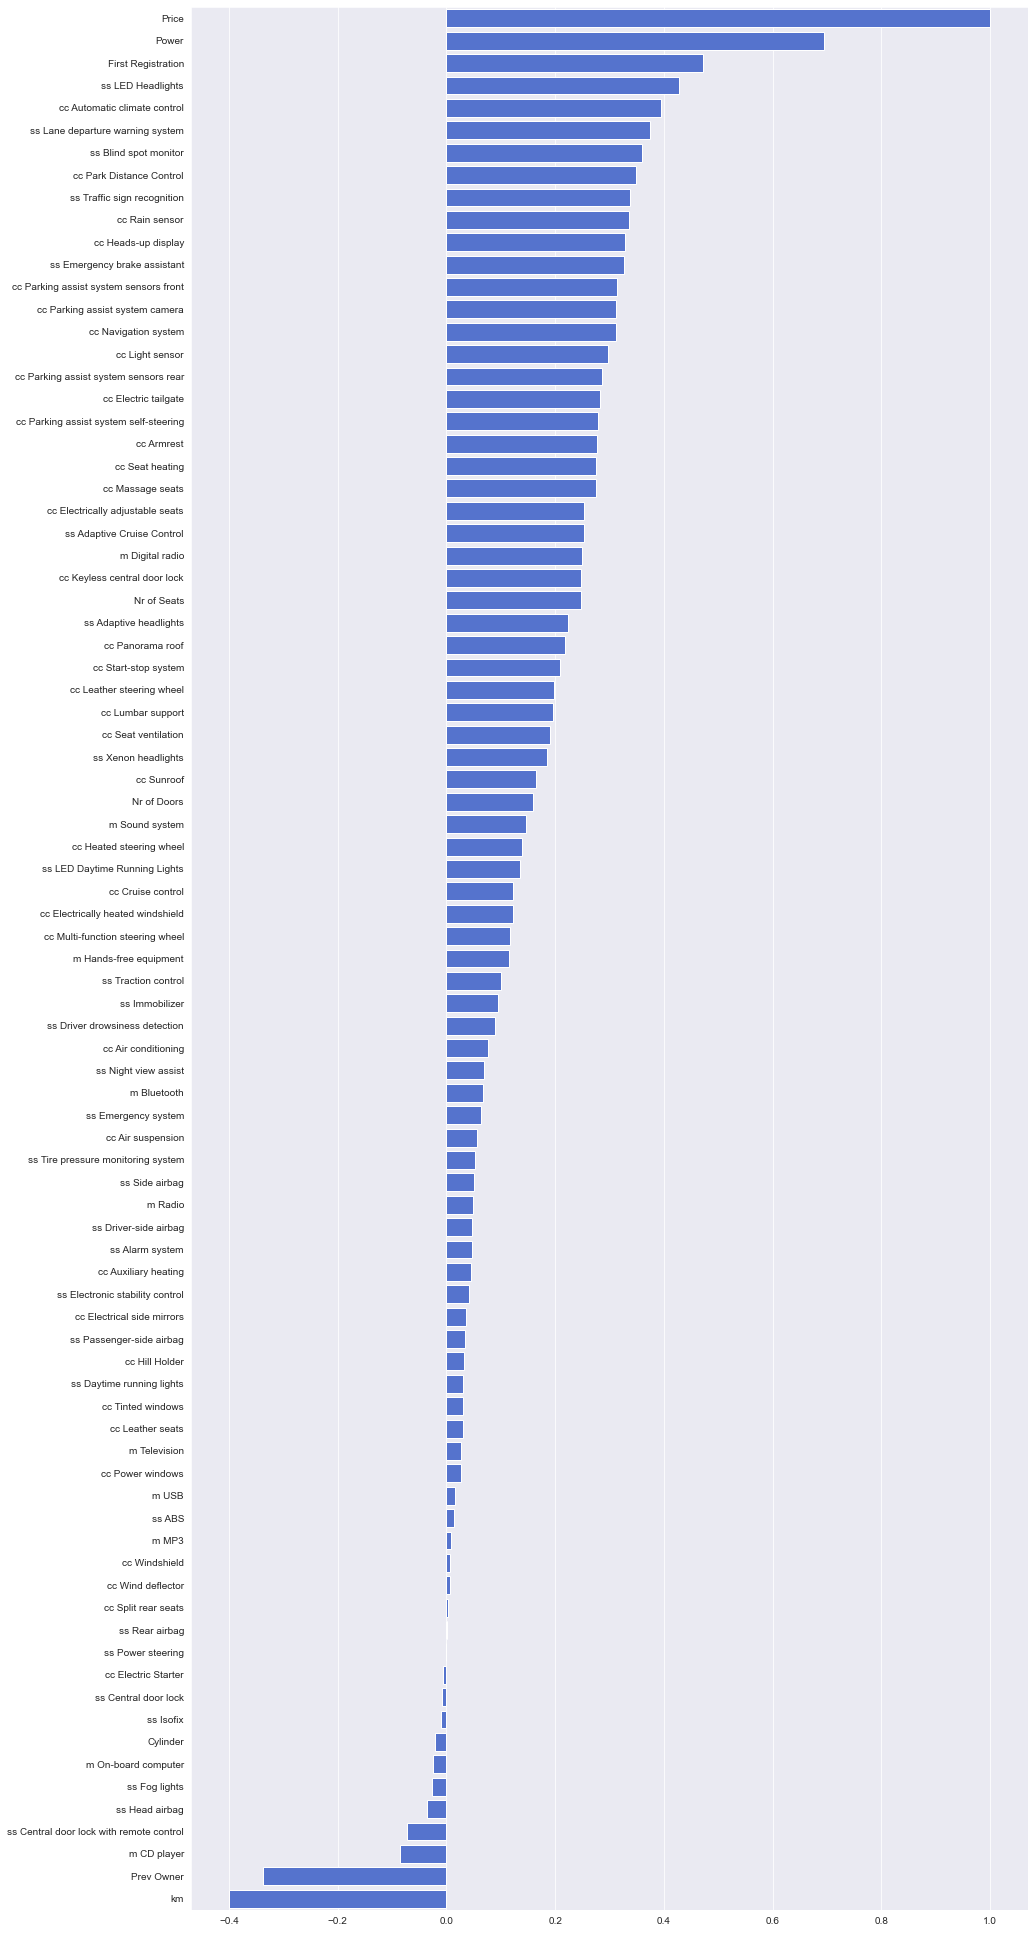

In [1276]:
plt.figure(figsize=(15,35))

dfcorr=dfnew.corr()["Price"].sort_values(ascending=False)
sns.barplot(dfcorr.values, dfcorr.index, orient="horizontal", color="royalblue");

# 
To sum up, the power parameter has the biggest relationship with the price.